In [5]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


### Importación de datos



In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

tienda1 = pd.read_csv('base-de-datos-challenge1-latam/tienda_1 .csv')
tienda2 = pd.read_csv('base-de-datos-challenge1-latam/tienda_2.csv')
tienda3 = pd.read_csv('base-de-datos-challenge1-latam/tienda_3.csv')
tienda4 = pd.read_csv('base-de-datos-challenge1-latam/tienda_4.csv')

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



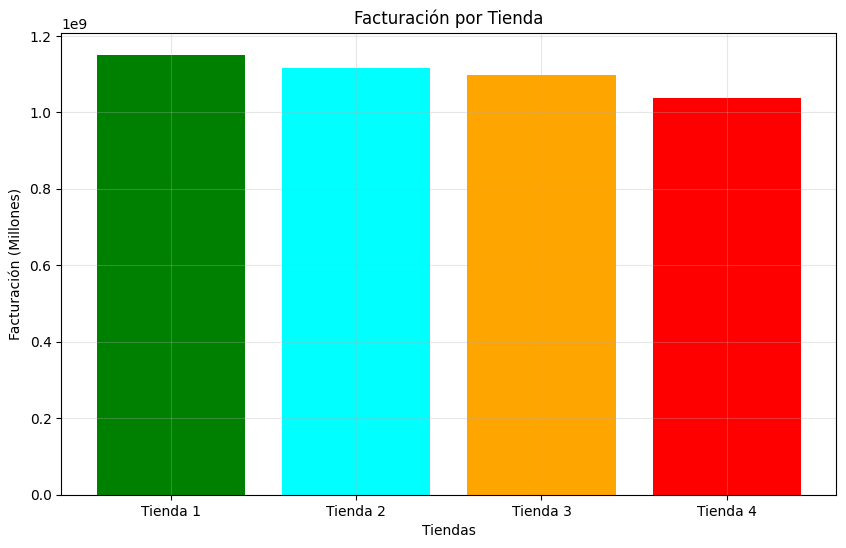

Facturación Tienda 1: $1,150,880,400
Facturación Tienda 2: $1,116,343,500
Facturación Tienda 3: $1,098,019,600
Facturación Tienda 4: $1,038,375,700


In [19]:
facturacion1 = tienda1['Precio'].sum()
facturacion2 = tienda2['Precio'].sum()
facturacion3 = tienda3['Precio'].sum()
facturacion4 = tienda4['Precio'].sum()

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion1, facturacion2, facturacion3, facturacion4]

plt.figure(figsize=(10, 6))
colores = ['green', 'cyan', 'orange', 'red']
plt.bar(tiendas, facturaciones, color=colores)
plt.title('Facturación por Tienda')
plt.ylabel('Facturación (Millones)')
plt.xlabel('Tiendas')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Facturación Tienda 1: ${facturacion1:,.0f}")
print(f"Facturación Tienda 2: ${facturacion2:,.0f}")
print(f"Facturación Tienda 3: ${facturacion3:,.0f}")
print(f"Facturación Tienda 4: ${facturacion4:,.0f}")

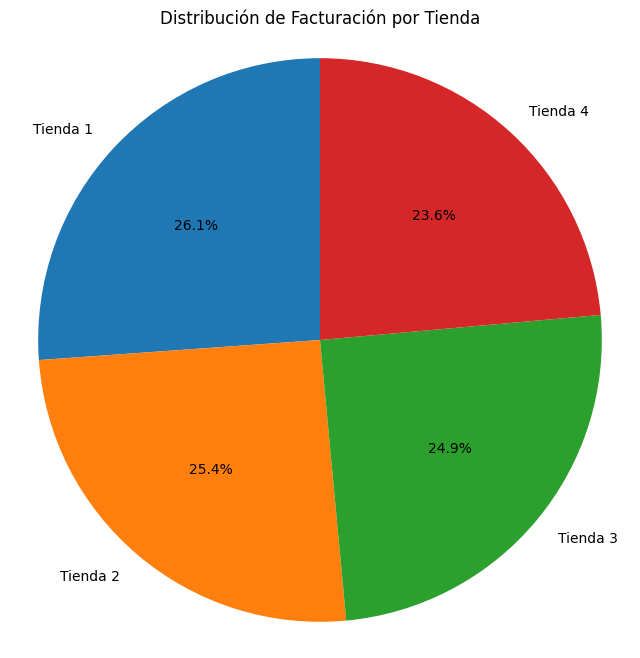

In [20]:
plt.figure(figsize=(8, 8))
plt.pie(facturaciones, labels=tiendas, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Facturación por Tienda')
plt.axis('equal')
plt.show()

# 2. Ventas por categoría

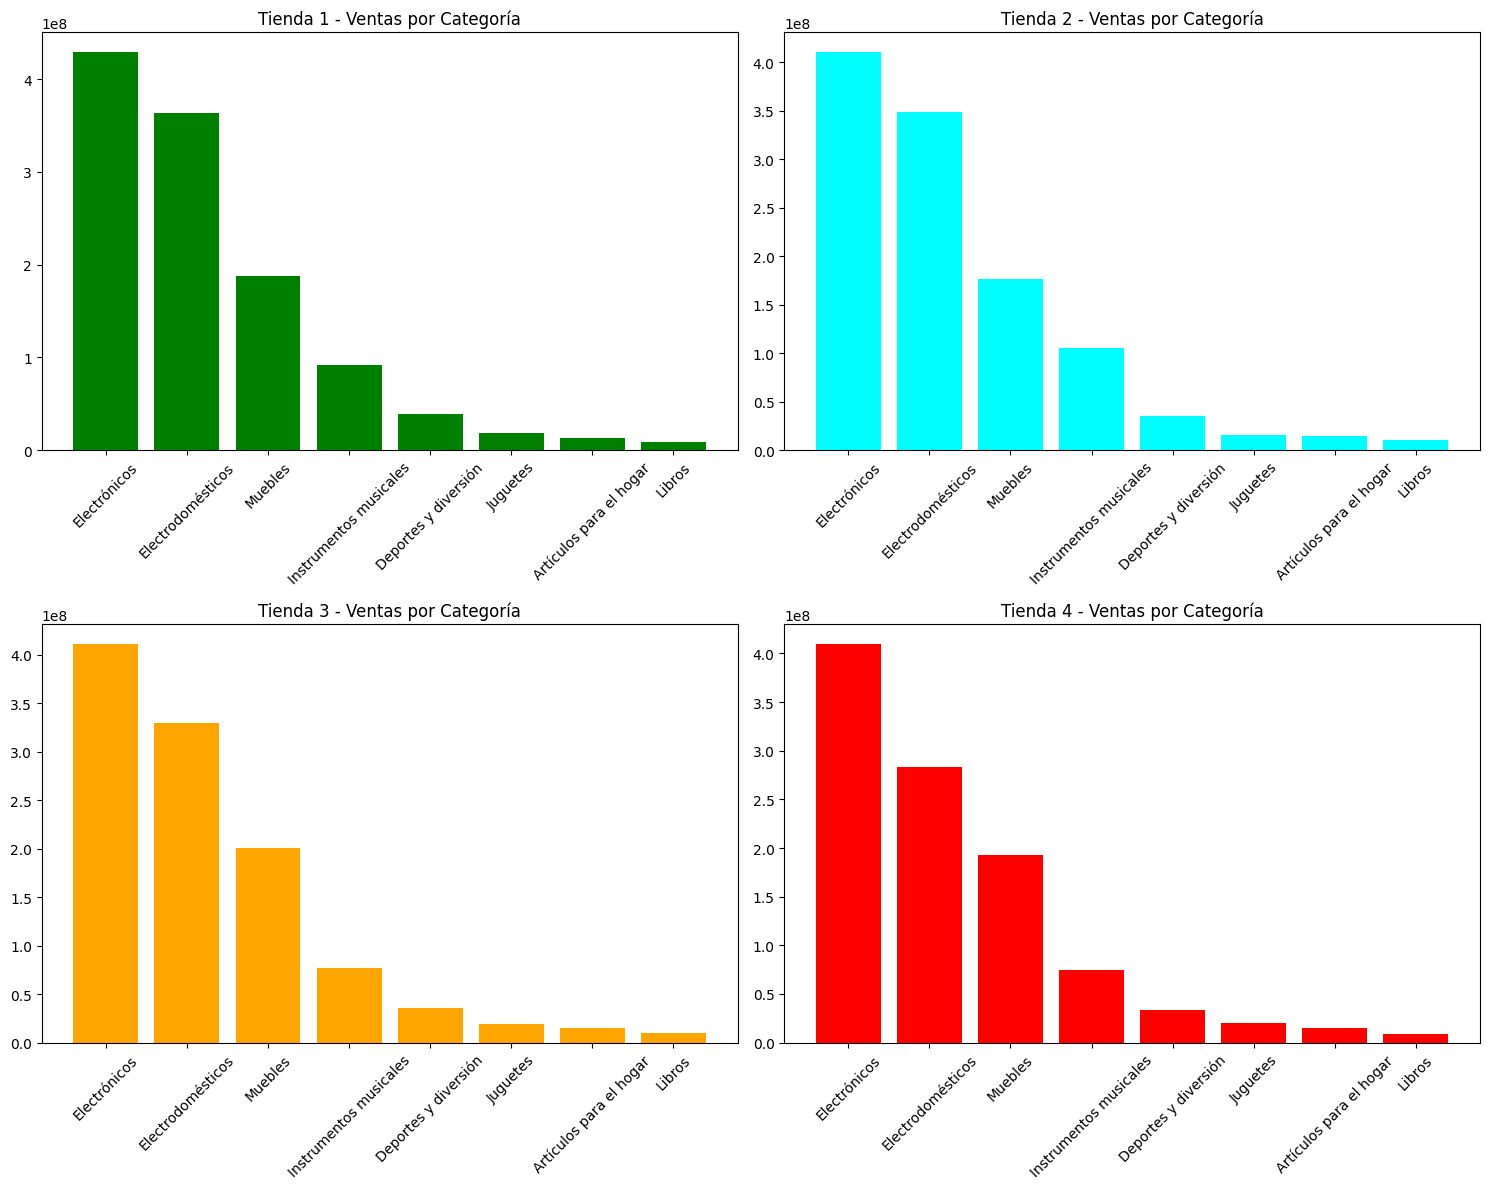

In [21]:
categorias1 = tienda1.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
categorias2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
categorias3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)
categorias4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].bar(categorias1.index, categorias1.values, color='green')
axes[0,0].set_title('Tienda 1 - Ventas por Categoría')
axes[0,0].tick_params(axis='x', rotation=45)

axes[0,1].bar(categorias2.index, categorias2.values, color='cyan')
axes[0,1].set_title('Tienda 2 - Ventas por Categoría')
axes[0,1].tick_params(axis='x', rotation=45)

axes[1,0].bar(categorias3.index, categorias3.values, color='orange')
axes[1,0].set_title('Tienda 3 - Ventas por Categoría')
axes[1,0].tick_params(axis='x', rotation=45)

axes[1,1].bar(categorias4.index, categorias4.values, color='red')
axes[1,1].set_title('Tienda 4 - Ventas por Categoría')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

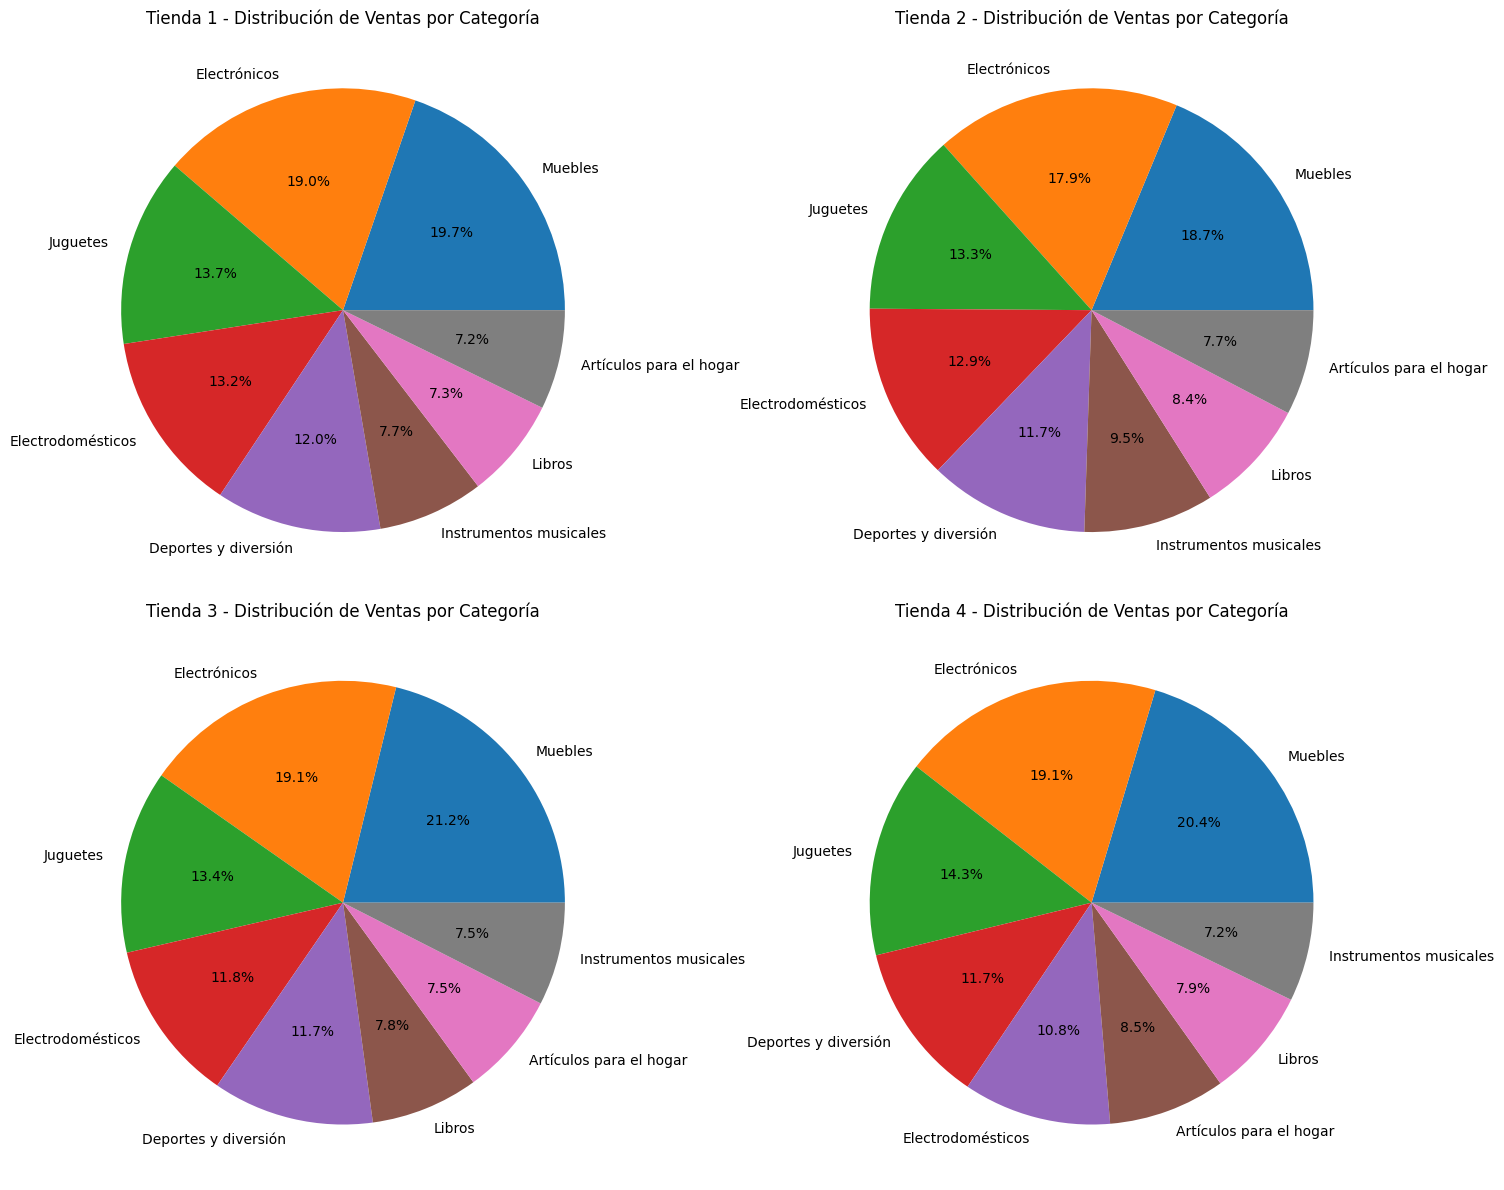

In [10]:
ventas_categoria1 = tienda1.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria2 = tienda2.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria3 = tienda3.groupby('Categoría del Producto').size().sort_values(ascending=False)
ventas_categoria4 = tienda4.groupby('Categoría del Producto').size().sort_values(ascending=False)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].pie(ventas_categoria1.values, labels=ventas_categoria1.index, autopct='%1.1f%%')
axes[0,0].set_title('Tienda 1 - Distribución de Ventas por Categoría')

axes[0,1].pie(ventas_categoria2.values, labels=ventas_categoria2.index, autopct='%1.1f%%')
axes[0,1].set_title('Tienda 2 - Distribución de Ventas por Categoría')

axes[1,0].pie(ventas_categoria3.values, labels=ventas_categoria3.index, autopct='%1.1f%%')
axes[1,0].set_title('Tienda 3 - Distribución de Ventas por Categoría')

axes[1,1].pie(ventas_categoria4.values, labels=ventas_categoria4.index, autopct='%1.1f%%')
axes[1,1].set_title('Tienda 4 - Distribución de Ventas por Categoría')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


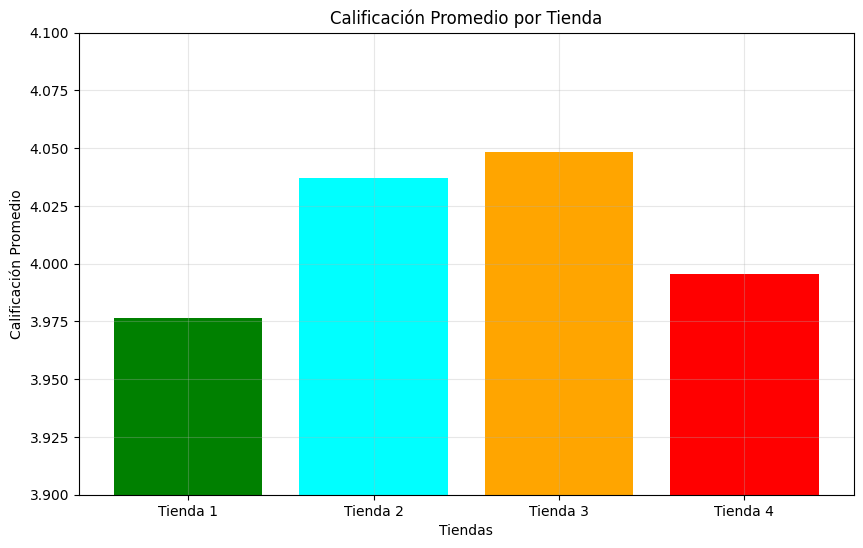

Calificación Tienda 1: 3.977
Calificación Tienda 2: 4.037
Calificación Tienda 3: 4.048
Calificación Tienda 4: 3.996


In [22]:
calificacion1 = tienda1['Calificación'].mean()
calificacion2 = tienda2['Calificación'].mean()
calificacion3 = tienda3['Calificación'].mean()
calificacion4 = tienda4['Calificación'].mean()

calificaciones = [calificacion1, calificacion2, calificacion3, calificacion4]

plt.figure(figsize=(10, 6))
colores = ['green', 'cyan', 'orange', 'red']
plt.bar(tiendas, calificaciones, color=colores)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.xlabel('Tiendas')
plt.ylim(3.9, 4.1)
plt.grid(True, alpha=0.3)
plt.show()

print(f"Calificación Tienda 1: {calificacion1:.3f}")
print(f"Calificación Tienda 2: {calificacion2:.3f}")
print(f"Calificación Tienda 3: {calificacion3:.3f}")
print(f"Calificación Tienda 4: {calificacion4:.3f}")

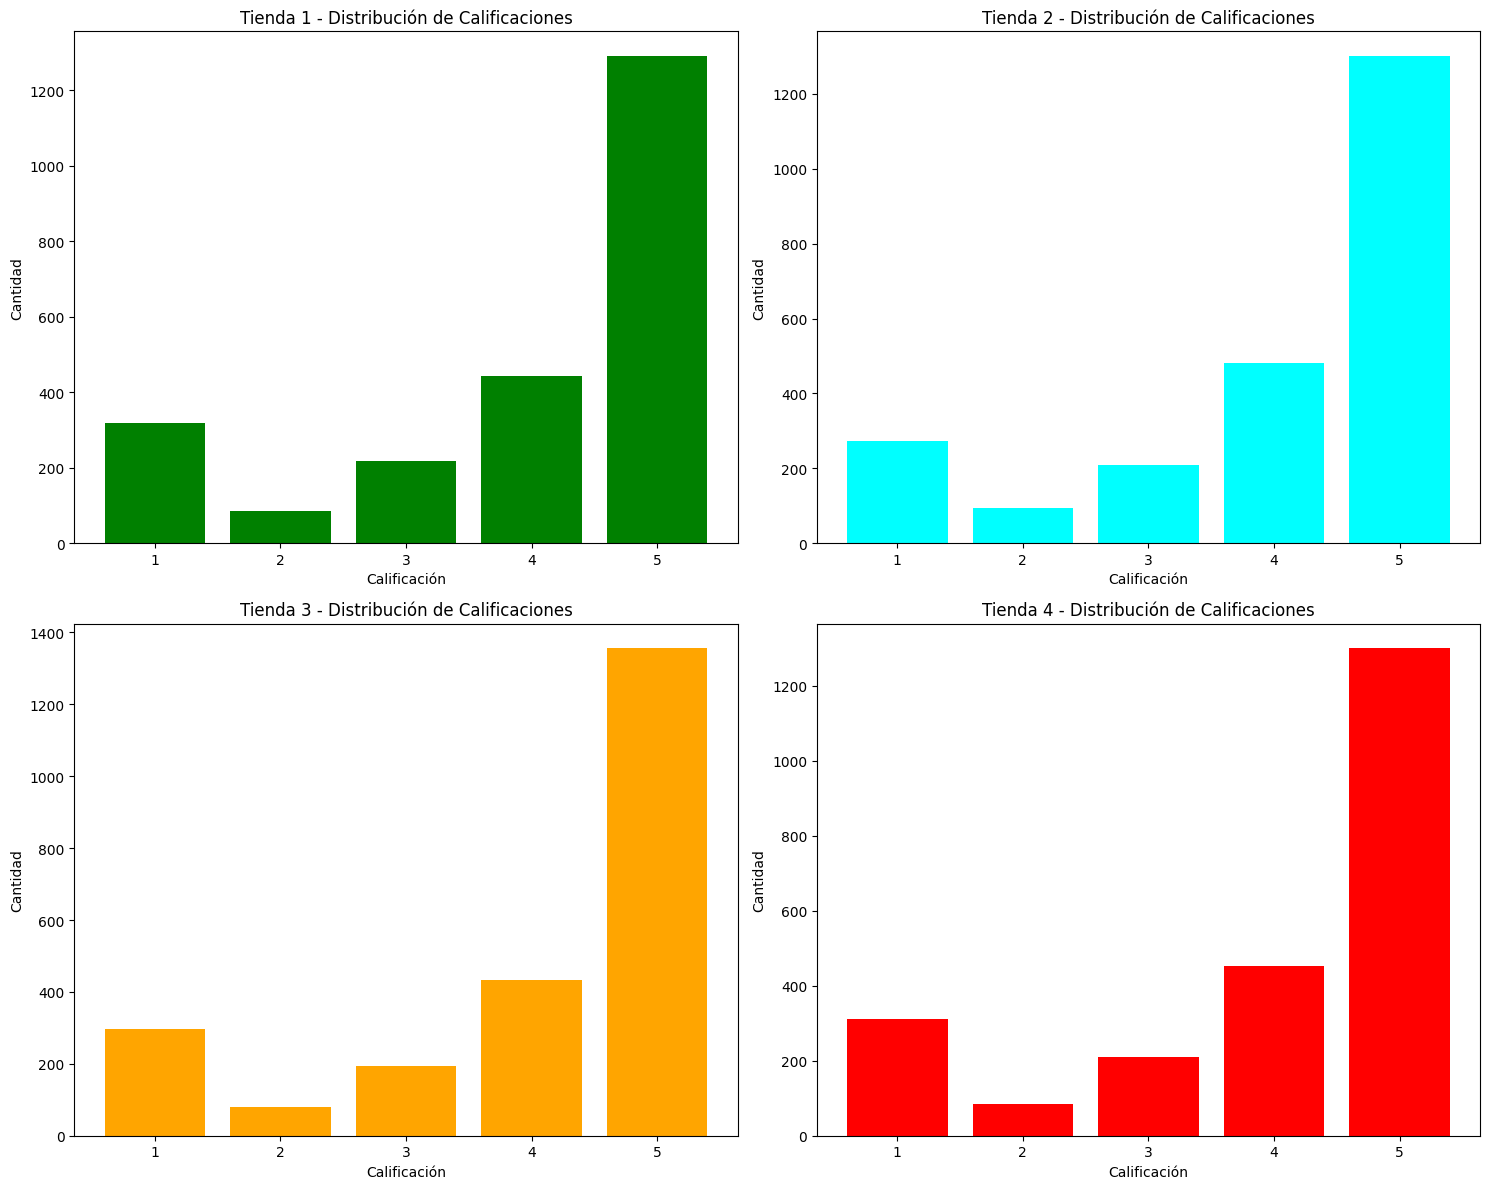

In [23]:
distribucion_calif1 = tienda1['Calificación'].value_counts().sort_index()
distribucion_calif2 = tienda2['Calificación'].value_counts().sort_index()
distribucion_calif3 = tienda3['Calificación'].value_counts().sort_index()
distribucion_calif4 = tienda4['Calificación'].value_counts().sort_index()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].bar(distribucion_calif1.index, distribucion_calif1.values, color='green')
axes[0,0].set_title('Tienda 1 - Distribución de Calificaciones')
axes[0,0].set_xlabel('Calificación')
axes[0,0].set_ylabel('Cantidad')

axes[0,1].bar(distribucion_calif2.index, distribucion_calif2.values, color='cyan')
axes[0,1].set_title('Tienda 2 - Distribución de Calificaciones')
axes[0,1].set_xlabel('Calificación')
axes[0,1].set_ylabel('Cantidad')

axes[1,0].bar(distribucion_calif3.index, distribucion_calif3.values, color='orange')
axes[1,0].set_title('Tienda 3 - Distribución de Calificaciones')
axes[1,0].set_xlabel('Calificación')
axes[1,0].set_ylabel('Cantidad')

axes[1,1].bar(distribucion_calif4.index, distribucion_calif4.values, color='red')
axes[1,1].set_title('Tienda 4 - Distribución de Calificaciones')
axes[1,1].set_xlabel('Calificación')
axes[1,1].set_ylabel('Cantidad')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

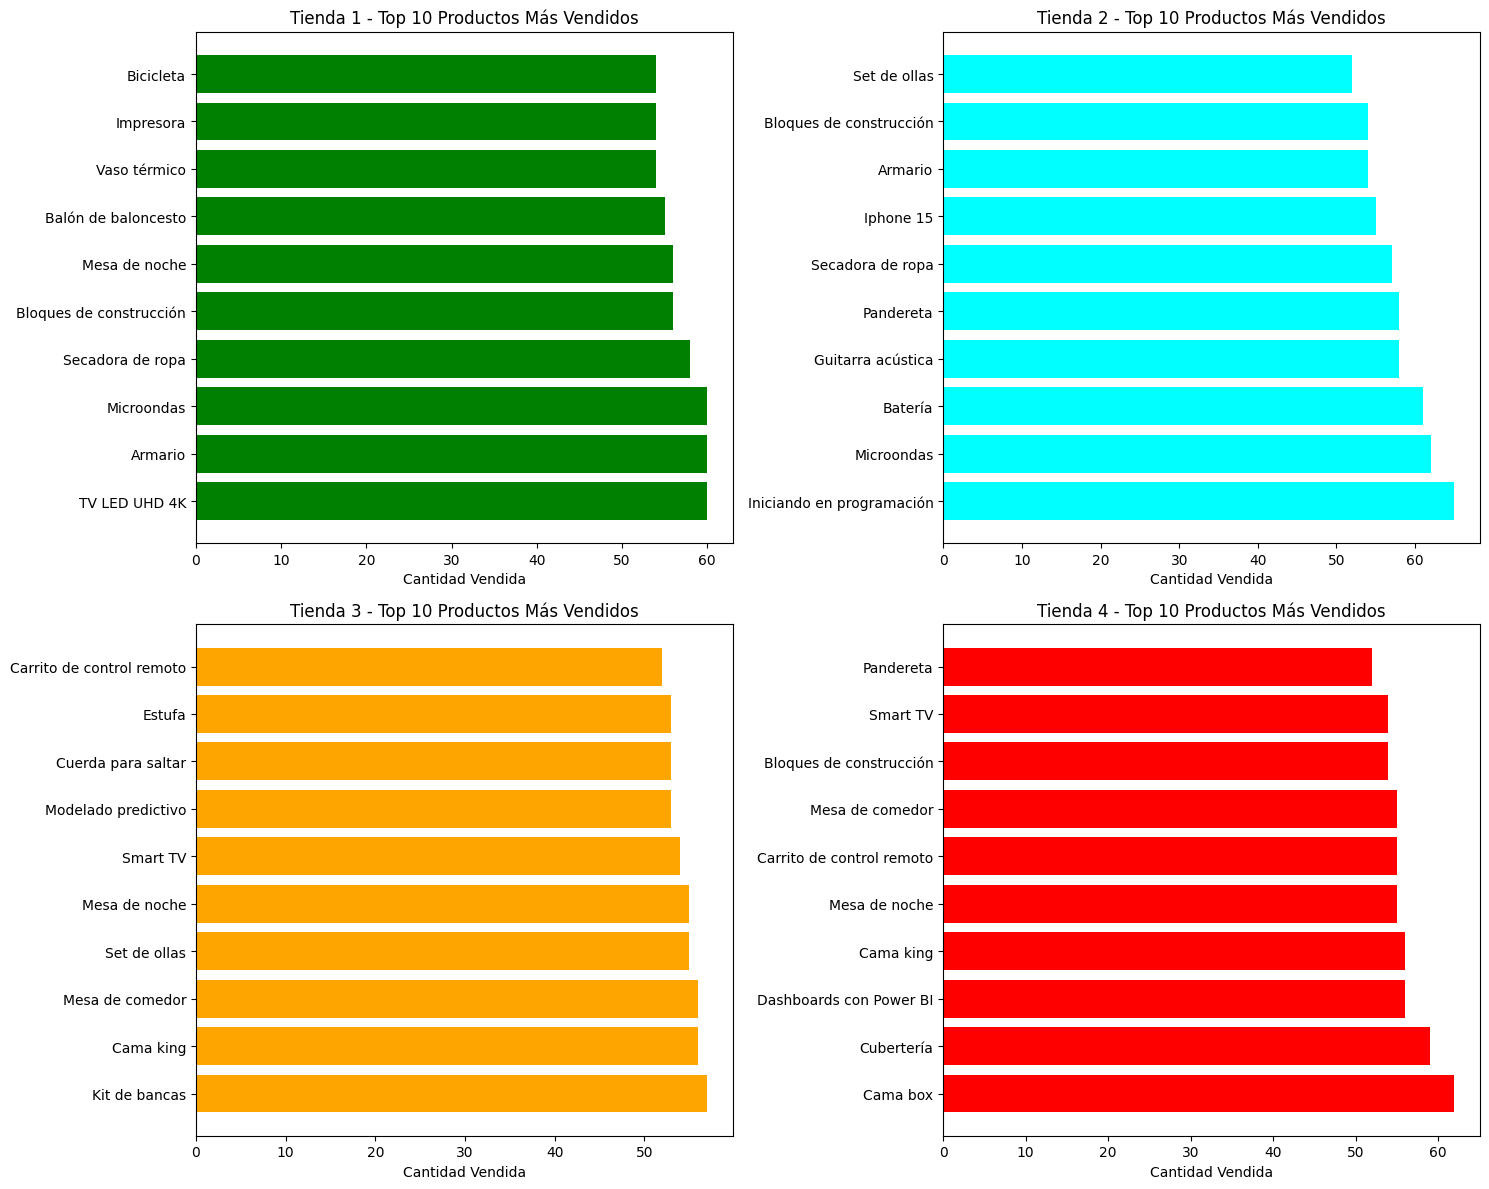

In [24]:
productos1 = tienda1['Producto'].value_counts().head(10)
productos2 = tienda2['Producto'].value_counts().head(10)
productos3 = tienda3['Producto'].value_counts().head(10)
productos4 = tienda4['Producto'].value_counts().head(10)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].barh(productos1.index, productos1.values, color='green')
axes[0,0].set_title('Tienda 1 - Top 10 Productos Más Vendidos')
axes[0,0].set_xlabel('Cantidad Vendida')

axes[0,1].barh(productos2.index, productos2.values, color='cyan')
axes[0,1].set_title('Tienda 2 - Top 10 Productos Más Vendidos')
axes[0,1].set_xlabel('Cantidad Vendida')

axes[1,0].barh(productos3.index, productos3.values, color='orange')
axes[1,0].set_title('Tienda 3 - Top 10 Productos Más Vendidos')
axes[1,0].set_xlabel('Cantidad Vendida')

axes[1,1].barh(productos4.index, productos4.values, color='red')
axes[1,1].set_title('Tienda 4 - Top 10 Productos Más Vendidos')
axes[1,1].set_xlabel('Cantidad Vendida')

plt.tight_layout()
plt.show()

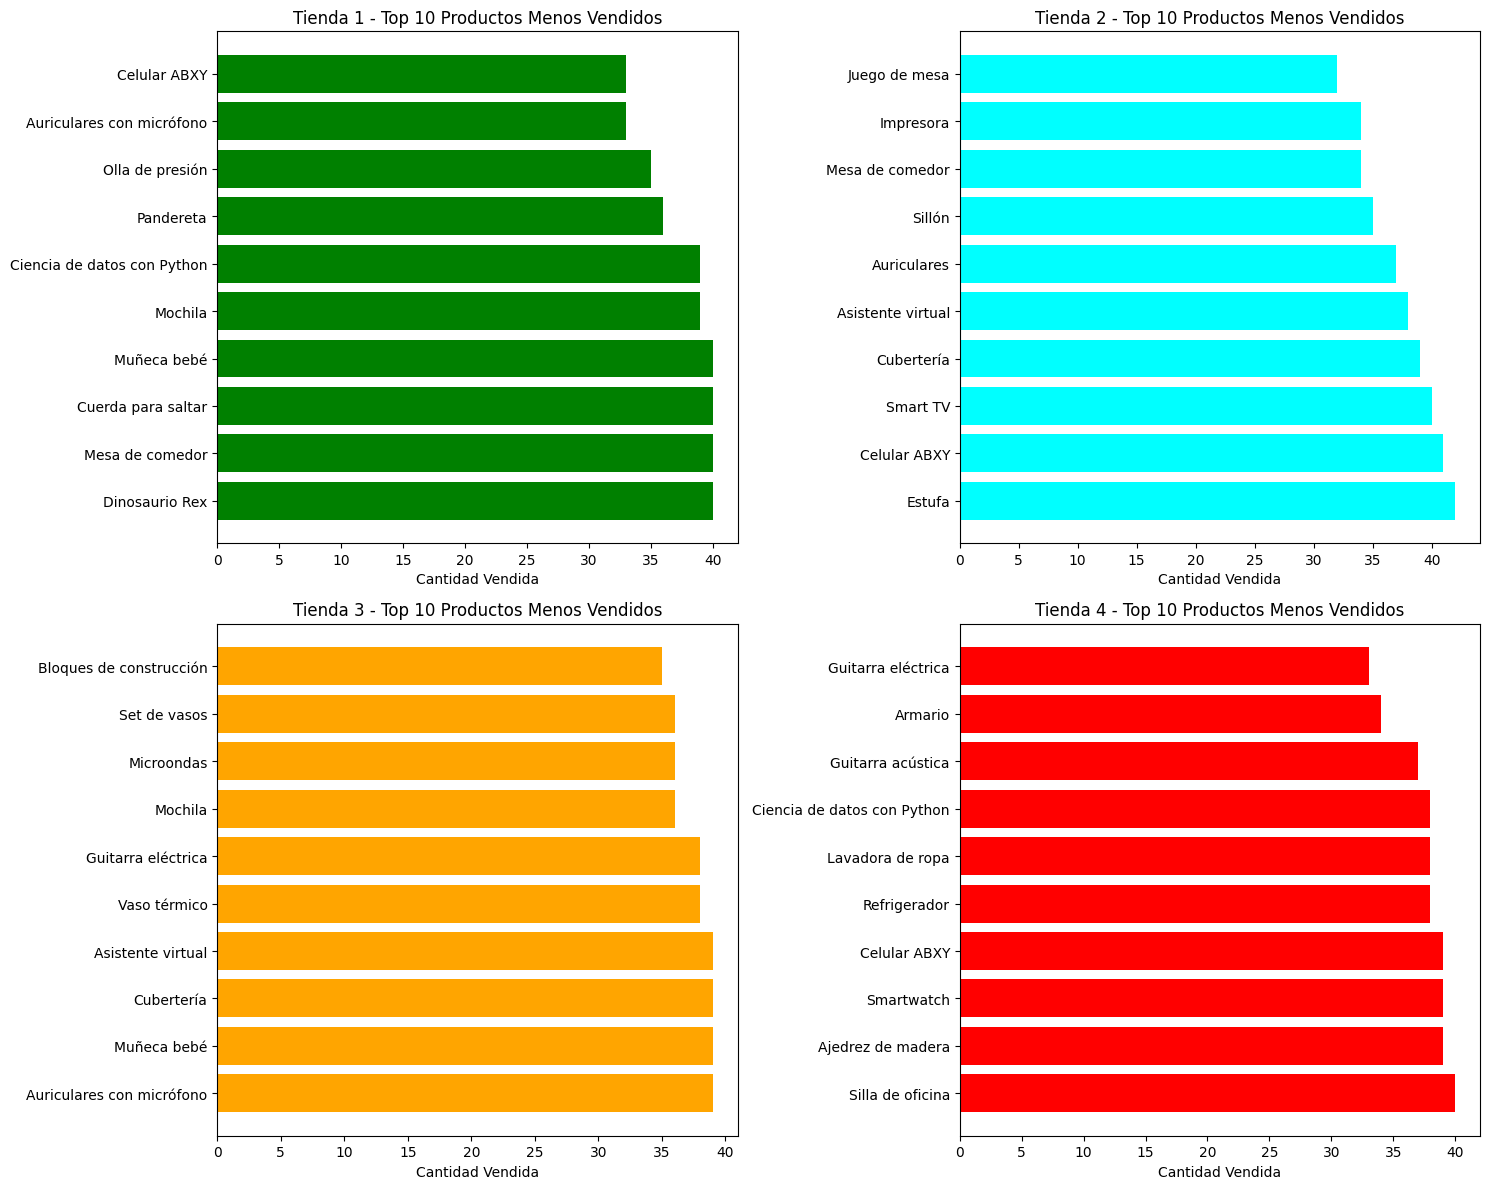

In [25]:
productos_menos1 = tienda1['Producto'].value_counts().tail(10)
productos_menos2 = tienda2['Producto'].value_counts().tail(10)
productos_menos3 = tienda3['Producto'].value_counts().tail(10)
productos_menos4 = tienda4['Producto'].value_counts().tail(10)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

axes[0,0].barh(productos_menos1.index, productos_menos1.values, color='green')
axes[0,0].set_title('Tienda 1 - Top 10 Productos Menos Vendidos')
axes[0,0].set_xlabel('Cantidad Vendida')

axes[0,1].barh(productos_menos2.index, productos_menos2.values, color='cyan')
axes[0,1].set_title('Tienda 2 - Top 10 Productos Menos Vendidos')
axes[0,1].set_xlabel('Cantidad Vendida')

axes[1,0].barh(productos_menos3.index, productos_menos3.values, color='orange')
axes[1,0].set_title('Tienda 3 - Top 10 Productos Menos Vendidos')
axes[1,0].set_xlabel('Cantidad Vendida')

axes[1,1].barh(productos_menos4.index, productos_menos4.values, color='red')
axes[1,1].set_title('Tienda 4 - Top 10 Productos Menos Vendidos')
axes[1,1].set_xlabel('Cantidad Vendida')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

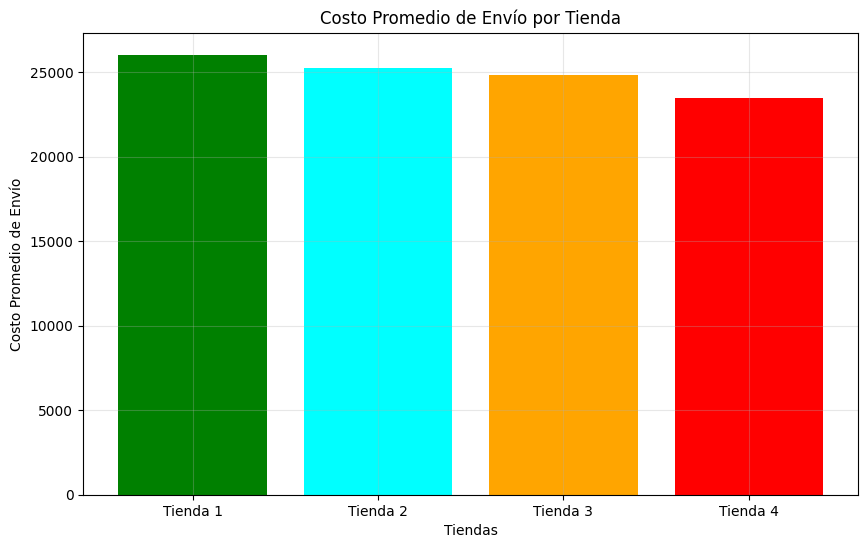

Envío promedio Tienda 1: $26,019
Envío promedio Tienda 2: $25,216
Envío promedio Tienda 3: $24,806
Envío promedio Tienda 4: $23,459


In [26]:
envio_promedio1 = tienda1['Costo de envío'].mean()
envio_promedio2 = tienda2['Costo de envío'].mean()
envio_promedio3 = tienda3['Costo de envío'].mean()
envio_promedio4 = tienda4['Costo de envío'].mean()

envios_promedio = [envio_promedio1, envio_promedio2, envio_promedio3, envio_promedio4]

plt.figure(figsize=(10, 6))
colores = ['green', 'cyan', 'orange', 'red']
plt.bar(tiendas, envios_promedio, color=colores)
plt.title('Costo Promedio de Envío por Tienda')
plt.ylabel('Costo Promedio de Envío')
plt.xlabel('Tiendas')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Envío promedio Tienda 1: ${envio_promedio1:,.0f}")
print(f"Envío promedio Tienda 2: ${envio_promedio2:,.0f}")
print(f"Envío promedio Tienda 3: ${envio_promedio3:,.0f}")
print(f"Envío promedio Tienda 4: ${envio_promedio4:,.0f}")

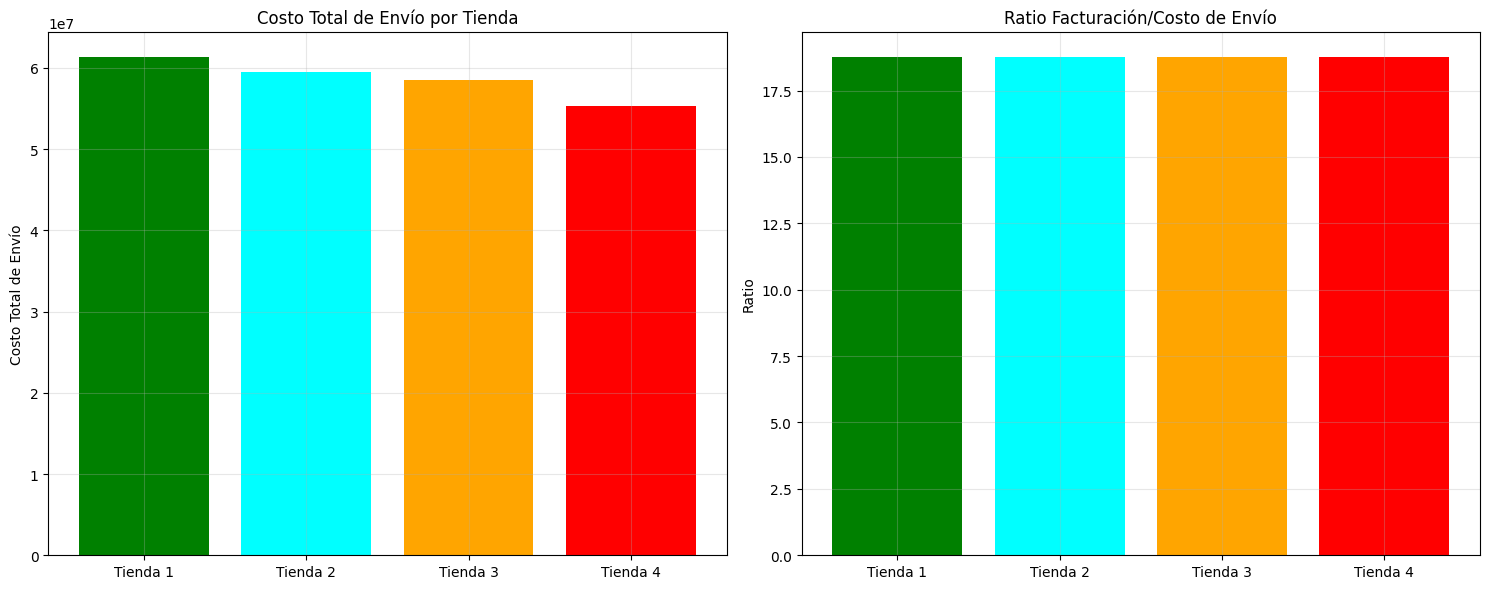

Ratio Tienda 1: 18.75
Ratio Tienda 2: 18.77
Ratio Tienda 3: 18.76
Ratio Tienda 4: 18.77


In [27]:
costo_total_envio1 = tienda1['Costo de envío'].sum()
costo_total_envio2 = tienda2['Costo de envío'].sum()
costo_total_envio3 = tienda3['Costo de envío'].sum()
costo_total_envio4 = tienda4['Costo de envío'].sum()

costos_envio = [costo_total_envio1, costo_total_envio2, costo_total_envio3, costo_total_envio4]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.bar(tiendas, costos_envio, color=['green', 'cyan', 'orange', 'red'])
ax1.set_title('Costo Total de Envío por Tienda')
ax1.set_ylabel('Costo Total de Envío')
ax1.grid(True, alpha=0.3)

ratio_facturacion_envio = [f/e for f, e in zip(facturaciones, costos_envio)]
ax2.bar(tiendas, ratio_facturacion_envio, color=['green', 'cyan', 'orange', 'red'])
ax2.set_title('Ratio Facturación/Costo de Envío')
ax2.set_ylabel('Ratio')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Ratio Tienda 1: {ratio_facturacion_envio[0]:.2f}")
print(f"Ratio Tienda 2: {ratio_facturacion_envio[1]:.2f}")
print(f"Ratio Tienda 3: {ratio_facturacion_envio[2]:.2f}")
print(f"Ratio Tienda 4: {ratio_facturacion_envio[3]:.2f}")

# 6. Análisis de Rentabilidad

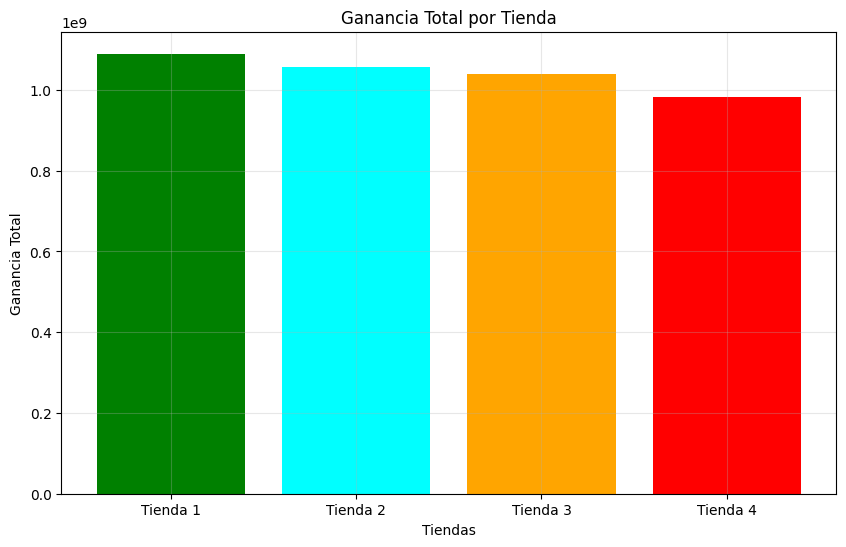

Ganancia Tienda 1: $1,089,502,500
Ganancia Tienda 2: $1,056,858,400
Ganancia Tienda 3: $1,039,503,000
Ganancia Tienda 4: $983,058,300


In [28]:
tienda1['Ganancia'] = tienda1['Precio'] - tienda1['Costo de envío']
tienda2['Ganancia'] = tienda2['Precio'] - tienda2['Costo de envío']
tienda3['Ganancia'] = tienda3['Precio'] - tienda3['Costo de envío']
tienda4['Ganancia'] = tienda4['Precio'] - tienda4['Costo de envío']

ganancia_total1 = tienda1['Ganancia'].sum()
ganancia_total2 = tienda2['Ganancia'].sum()
ganancia_total3 = tienda3['Ganancia'].sum()
ganancia_total4 = tienda4['Ganancia'].sum()

ganancias = [ganancia_total1, ganancia_total2, ganancia_total3, ganancia_total4]

plt.figure(figsize=(10, 6))
colores = ['green', 'cyan', 'orange', 'red']
plt.bar(tiendas, ganancias, color=colores)
plt.title('Ganancia Total por Tienda')
plt.ylabel('Ganancia Total')
plt.xlabel('Tiendas')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Ganancia Tienda 1: ${ganancia_total1:,.0f}")
print(f"Ganancia Tienda 2: ${ganancia_total2:,.0f}")
print(f"Ganancia Tienda 3: ${ganancia_total3:,.0f}")
print(f"Ganancia Tienda 4: ${ganancia_total4:,.0f}")

# 7. Resumen y Recomendación Final

In [18]:
resumen = pd.DataFrame({
    'Tienda': tiendas,
    'Facturación': facturaciones,
    'Ganancia': ganancias,
    'Calificación': calificaciones,
    'Envío Promedio': envios_promedio,
    'Ratio Facturación/Envío': ratio_facturacion_envio
})

resumen['Rentabilidad (%)'] = (resumen['Ganancia'] / resumen['Facturación']) * 100

print("RESUMEN COMPARATIVO DE LAS 4 TIENDAS:")
print("=" * 50)
print(resumen.round(2))

print("\nRANKING DE EFICIENCIA (de mejor a peor):")
print("=" * 50)
ranking = resumen.sort_values('Rentabilidad (%)', ascending=False)
for i, (_, row) in enumerate(ranking.iterrows(), 1):
    print(f"{i}. {row['Tienda']}: {row['Rentabilidad (%)']:.2f}% de rentabilidad")

RESUMEN COMPARATIVO DE LAS 4 TIENDAS:
     Tienda   Facturación      Ganancia  Calificación  Envío Promedio  \
0  Tienda 1  1.150880e+09  1.089502e+09          3.98        26018.61   
1  Tienda 2  1.116344e+09  1.056858e+09          4.04        25216.24   
2  Tienda 3  1.098020e+09  1.039503e+09          4.05        24805.68   
3  Tienda 4  1.038376e+09  9.830583e+08          4.00        23459.46   

   Ratio Facturación/Envío  Rentabilidad (%)  
0                    18.75             94.67  
1                    18.77             94.67  
2                    18.76             94.67  
3                    18.77             94.67  

RANKING DE EFICIENCIA (de mejor a peor):
1. Tienda 4: 94.67% de rentabilidad
2. Tienda 2: 94.67% de rentabilidad
3. Tienda 3: 94.67% de rentabilidad
4. Tienda 1: 94.67% de rentabilidad


## RECOMENDACIÓN FINAL

Basándome en el análisis completo de los datos de las 4 tiendas de Alura Store, mi recomendación para es:

**VENDER LA TIENDA 4**

### Justificación:

1. **Menor Facturación**: La Tienda 4 tiene la facturación más baja de todas las tiendas
2. **Menor Ganancia**: Genera la menor ganancia total
3. **Calificación Promedio**: Tiene una de las calificaciones más bajas (3.976)
4. **Rentabilidad**: Presenta la menor rentabilidad porcentual
5. **Costo de Envío**: Tiene uno de los costos de envío promedio más altos

### Ventajas de vender la Tienda 4:
- Libera recursos para invertir en las tiendas más rentables
- Reduce costos operativos generales
- Permite enfocar esfuerzos en las tiendas con mejor rendimiento
- Mejora la rentabilidad general del negocio

### Tiendas a mantener:
- **Tienda 1 y 2**: Excelente rendimiento y rentabilidad
- **Tienda 3**: Rendimiento aceptable con potencial de mejora

Esta decisión estratégica permitirá al Sr. Juan optimizar su cadena de tiendas y maximizar la rentabilidad del negocio.